<a href="https://colab.research.google.com/github/HwangJae-won/Vaccine_Classification/blob/main/vaccine_classication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# !pip install pycaret[full]
# !pip install pyyaml==5.4.1
# # !pip install autoviz
# # !pip install xlrd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
# from category_encoders import OrdinalEncoder
# from sklearn.impute import SimpleImputer

In [ ]:
#from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data description

1. labels (백신 접종 여부 yes=1, no=0)
- h1n1_vaccine
- seasonal_vaccine

2. binary_categorical_features
- behavioral_antiviral_meds(항바이러스제 복용 여부)
- behavioral_avoidance (접촉 회피 여부)
- behavioral_face_mask(마스크 구매 여부)
- behavioral_wash_hands(손 자주 씻는지 여부)
- behavioral_large_gatherings(단체 모임 시간 단축 여부)
- behavioral_outside_home(집 밖의 사람들과의 접촉이 줄었는지 여부)
- behavioral_touch_face(얼굴을 만지는 횟수 줄었는지 여부)
- doctor_recc_h1n1(의사한테 H1N1 백신 추천 받았는지 여부)
- doctor_recc_seasonal(의사한테 Seasonal flu 백신 추천 받았는지 여부)
- chronic_med_condition(만성 질환 여부)
- child_under_6_months(6개월 미만 자녀와 밀접 접촉 여부)
- health_worker(healthcare worker 여부)
- health_insurance(건강 보험 여부)



3. multi_categorical_features
- h1n1_concern (0, 1, 2, 3)
- h1n1_knowledge (0, 1, 2)
- opinion_h1n1_vacc_effective(1, 2, 3, 4, 5)
- opinion_h1n1_risk(1, 2, 3, 4, 5)
- opinion_h1n1_sick_from_vacc(1, 2, 3, 4, 5)
- opinion_seas_vacc_effective(1, 2, 3, 4, 5)
- opinion_seas_risk(1, 2, 3, 4, 5)
- opinion_seas_sick_from_vacc(1, 2, 3, 4, 5)


4. character_categorical_features
- age_group
- education
- race
- sex
- income_poverty
- marital_status
- rent_or_own
- employment_status
- hhs_geo_region
- census_msa
- employment_industry
- employment_occupation

5. numerical_features
- household_adults
- household_children

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/데이터마이닝_3조/Data/"

In [ ]:
train_features=pd.read_csv(path+'training_set_features.csv')
train_labels=pd.read_csv(path+'training_set_labels.csv')
test_features=pd.read_csv(path+'test_set_features.csv')
sample=pd.read_csv(path+'submission_format.csv')

In [ ]:
# set index as respondent_id
train_features = train_features.drop('respondent_id',axis=1)
test_features = test_features.drop('respondent_id',axis=1)

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [ ]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26623 non-null  float64
 1   h1n1_knowledge               26586 non-null  float64
 2   behavioral_antiviral_meds    26629 non-null  float64
 3   behavioral_avoidance         26495 non-null  float64
 4   behavioral_face_mask         26689 non-null  float64
 5   behavioral_wash_hands        26668 non-null  float64
 6   behavioral_large_gatherings  26636 non-null  float64
 7   behavioral_outside_home      26626 non-null  float64
 8   behavioral_touch_face        26580 non-null  float64
 9   doctor_recc_h1n1             24548 non-null  float64
 10  doctor_recc_seasonal         24548 non-null  float64
 11  chronic_med_condition        25776 non-null  float64
 12  child_under_6_months         25895 non-null  float64
 13  health_worker   

In [ ]:
train=pd.concat([train_features,train_labels], axis=1)
train.drop(train.columns[36], axis=1, inplace=True)

In [ ]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0


# Feature Engineering

In [ ]:
train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
test_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [ ]:
target_features=['h1n1_vaccine', 'seasonal_vaccine']
float_features=['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
character_features=['age_group',	'education',	'race',	'sex',	'income_poverty',	'marital_status',	'rent_or_own',	'employment_status',	'hhs_geo_region',	'census_msa', 'employment_industry',	'employment_occupation']

## 1. fill missing values

In [ ]:
# fill missing value (float features missing value -> -999, character features missing value -> 'unknown')
def fill_missing_value(df):
    df[character_features]=df[character_features].fillna('unknown')
    df[float_features]=df[float_features].fillna(-999)
    return df

In [ ]:
# # fill missing value (float features missing value -> mod character features missing value -> Mod)
# def fill_missing_value(df):
#   list_float=[]
#   list_char=[]
#   for i in range(len(float_features)):
#     flo=df[[float_features[i]]].fillna(df[float_features[i]].mode()[0])
#     list_float.append(flo)

#   for i in range(len(character_features)):
#     char=df[[character_features[i]]].fillna(df[character_features[i]].mode()[0])
#     list_char.append(char)

#   df1=pd.concat(list_float, axis=1)
#   df2=pd.concat(list_char, axis=1)
#   df=pd.concat([df1,df2],axis=1)
#   return df

In [ ]:
train_features=fill_missing_value(train_features)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [ ]:
test_features=fill_missing_value(test_features)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26708 non-null  float64
 1   h1n1_knowledge               26708 non-null  float64
 2   behavioral_antiviral_meds    26708 non-null  float64
 3   behavioral_avoidance         26708 non-null  float64
 4   behavioral_face_mask         26708 non-null  float64
 5   behavioral_wash_hands        26708 non-null  float64
 6   behavioral_large_gatherings  26708 non-null  float64
 7   behavioral_outside_home      26708 non-null  float64
 8   behavioral_touch_face        26708 non-null  float64
 9   doctor_recc_h1n1             26708 non-null  float64
 10  doctor_recc_seasonal         26708 non-null  float64
 11  chronic_med_condition        26708 non-null  float64
 12  child_under_6_months         26708 non-null  float64
 13  health_worker   

## 2. create features

### 1. add clustering features

In [ ]:
# clf_col = np.where(train_features.dtypes != object)[0]
# clf_feat = [train_features.columns[x] for x in clf_col]

In [ ]:
# kmeans = KMeans(4,random_state=42)
# kmeans.fit(train_features[clf_feat])
# train_features['clusters'] = kmeans.predict(train_features[clf_feat])
# test_features['clusters']  = kmeans.predict(test_features[clf_feat])

In [ ]:
# train_features['clusters'].value_counts()

In [ ]:
# test_features['clusters'].value_counts()

In [ ]:
# target_mean_train_y1 = pd.concat([train_features, train_labels],axis=1).groupby(['clusters']).mean()[['h1n1_vaccine']]
# target_mean_train_y2 = pd.concat([train_features, train_labels],axis=1).groupby(['clusters']).mean()[['seasonal_vaccine']]

In [ ]:
# for i in list(target_mean_train_y1.columns):
#   target_mean_train_y1.rename({i:i+"_mean"},axis=1,inplace=True)

# for i in list(target_mean_train_y2.columns):
#   target_mean_train_y2.rename({i:i+"_mean"},axis=1,inplace=True)

In [ ]:
# train_features = train_features.merge(target_mean_train_y1,how='left',on='clusters')
# test_features = test_features.merge(target_mean_train_y1,how="left",on='clusters')

In [ ]:
# train_features = train_features.merge(target_mean_train_y2,how='left',on='clusters')
# test_features = test_features.merge(target_mean_train_y2,how="left",on='clusters')

### 2. create and drop features

In [ ]:
def feature_engineering(df):

    behaviorals = [col for col in df.columns if 'behavioral' in col]
    df['behaviorals'] = df[behaviorals].sum(axis=1)

    opinion_h1n1 = [col for col in df.columns if 'opinion_h1n1' in col]
    df['opinion_h1n1'] = df[opinion_h1n1].sum(axis=1)

    opinion_seasonal = [col for col in df.columns if 'opinion_seasonal' in col]
    df['opinion_seasonal'] = df[opinion_seasonal].sum(axis=1)

    # # total_persons = 'household_adults' + 'household_children'
    # df['total_persons'] = df['household_adults']+df['household_children']

    # # 'face_mask_wash_hand' = 'behavioral_face_mask' + 'behavioral_wash_hands'
    # # 'face_mask_touch_face' = 'behavioral_face_mask' + 'behavioral_touch_face'
    # # 'wash_hands_touch_face' = 'behavioral_wash_hands' + 'behavioral_touch_face'
    # df['face_mask_wash_hand'] = df['behavioral_face_mask']+df['behavioral_wash_hands']
    # df['face_mask_touch_face'] = df['behavioral_face_mask'] + df['behavioral_touch_face']
    # df['wash_hands_touch_face'] = df['behavioral_wash_hands']+df['behavioral_touch_face']

    # # 'opinion_seas_vacc_eff_risk' = 'opinion_seas_vacc_effective' + 'opinion_seas_risk'
    # # 'opinion_seas_vacc_eff_sick' = 'opinion_seas_vacc_effective' + 'opinion_seas_sick_from_vacc'
    # # 'opinion_seas_risk_sick' = 'opinion_seas_risk' + 'opinion_seas_sick_from_vacc'
    # df['opinion_seas_vacc_eff_risk'] = df['opinion_seas_vacc_effective']+df['opinion_seas_risk']
    # df['opinion_seas_vacc_eff_sick'] = df['opinion_seas_vacc_effective'] + df['opinion_seas_sick_from_vacc']
    # df['opinion_seas_risk_sick']  = df['opinion_seas_risk']+df['opinion_seas_sick_from_vacc']

    # # 'opinion_h1n1_vacc_eff_risk' = 'opinion_h1n1_vacc_effective' + 'opinion_h1n1_risk'
    # # 'opinion_h1n1_vacc_eff_sick' = 'opinion_h1n1_vacc_effective' + 'opinion_h1n1_sick_from_vacc'
    # # 'opinion_h1n1_risk_sick' = 'opinion_h1n1_risk' + 'opinion_h1n1_sick_from_vacc'
    # df['opinion_h1n1_eff_risk'] = df['opinion_h1n1_vacc_effective']+df['opinion_h1n1_risk']
    # df['opinion_h1n1_vacc_eff_sick'] = df['opinion_h1n1_vacc_effective']+df['opinion_h1n1_sick_from_vacc']
    # df['opinion_h1n1_risk_sick']  = df['opinion_h1n1_risk']+df['opinion_h1n1_sick_from_vacc']

    # # 'h1n1_concern_knowledge' = 'h1n1_concern' + 'h1n1_knowledge'
    # df['h1n1_concern_knowledge']   = df['h1n1_concern'] + df['h1n1_knowledge']

    # # 'behavior_large_gath_outside_home' = 'behavioral_large_gatherings' + 'behavioral_outside_home'
    # df['behavior_large_gath_outside_home']  = df['behavioral_large_gatherings'] + df['behavioral_outside_home']

    # # drop features
    # drop_cols = ['behavioral_face_mask','behavioral_wash_hands','behavioral_touch_face','opinion_seas_vacc_effective',
    #        'opinion_seas_risk','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_vacc_effective',
    #        'opinion_seas_sick_from_vacc','opinion_h1n1_vacc_effective','opinion_h1n1_sick_from_vacc','h1n1_concern',
    #        'h1n1_knowledge','behavioral_large_gatherings','behavioral_outside_home','household_adults','household_children']

    # df.drop(drop_cols, axis=1, inplace=True)
    return df


In [ ]:
train_features=feature_engineering(train_features)
test_features=feature_engineering(test_features)

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [ ]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26708 non-null  float64
 1   h1n1_knowledge               26708 non-null  float64
 2   behavioral_antiviral_meds    26708 non-null  float64
 3   behavioral_avoidance         26708 non-null  float64
 4   behavioral_face_mask         26708 non-null  float64
 5   behavioral_wash_hands        26708 non-null  float64
 6   behavioral_large_gatherings  26708 non-null  float64
 7   behavioral_outside_home      26708 non-null  float64
 8   behavioral_touch_face        26708 non-null  float64
 9   doctor_recc_h1n1             26708 non-null  float64
 10  doctor_recc_seasonal         26708 non-null  float64
 11  chronic_med_condition        26708 non-null  float64
 12  child_under_6_months         26708 non-null  float64
 13  health_worker   

## 3. encoding

In [ ]:
float_cols=[train_features.columns[x] for x in np.where(train_features.dtypes != object)[0]]
for col in float_cols:
    train_features[col] = train_features[col].apply(str)
    test_features[col] = test_features[col].apply(str)

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [ ]:
#encoding 함수
def encoding(df):
  ## label encoding
  df['age_group']=label_encoder.fit_transform(df['age_group'])
  df['education']=label_encoder.fit_transform(df['education'])
  df['income_poverty']=label_encoder.fit_transform(df['income_poverty'])

  df['employment_occupation']=label_encoder.fit_transform(df['employment_occupation'])
  df['hhs_geo_region']=label_encoder.fit_transform(df['hhs_geo_region'])
  df['employment_industry']=label_encoder.fit_transform(df['employment_industry'])

  df_onehot=pd.get_dummies(df[['sex','rent_or_own','marital_status','employment_status','race','census_msa']])
  df_encoding=pd.concat([df, df_onehot ], axis = 1)
  #df_onehot = pd.concat([df, sex_onehot,rent_onehot,marital_onehot,em_sta_onehot,race_onehot, census_onehot ], axis = 1)
  df_encoding =  df_encoding.drop(columns = ['sex','rent_or_own','marital_status','employment_status','race','census_msa'])

  return df_encoding

In [ ]:
train_features_final=encoding(train_features)
test_features_final=encoding(test_features)

In [ ]:
train_features_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   h1n1_concern                          26707 non-null  object
 1   h1n1_knowledge                        26707 non-null  object
 2   behavioral_antiviral_meds             26707 non-null  object
 3   behavioral_avoidance                  26707 non-null  object
 4   behavioral_face_mask                  26707 non-null  object
 5   behavioral_wash_hands                 26707 non-null  object
 6   behavioral_large_gatherings           26707 non-null  object
 7   behavioral_outside_home               26707 non-null  object
 8   behavioral_touch_face                 26707 non-null  object
 9   doctor_recc_h1n1                      26707 non-null  object
 10  doctor_recc_seasonal                  26707 non-null  object
 11  chronic_med_condition       

In [ ]:
test_features_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   h1n1_concern                          26708 non-null  object
 1   h1n1_knowledge                        26708 non-null  object
 2   behavioral_antiviral_meds             26708 non-null  object
 3   behavioral_avoidance                  26708 non-null  object
 4   behavioral_face_mask                  26708 non-null  object
 5   behavioral_wash_hands                 26708 non-null  object
 6   behavioral_large_gatherings           26708 non-null  object
 7   behavioral_outside_home               26708 non-null  object
 8   behavioral_touch_face                 26708 non-null  object
 9   doctor_recc_h1n1                      26708 non-null  object
 10  doctor_recc_seasonal                  26708 non-null  object
 11  chronic_med_condition       

## 4. finalize data


In [ ]:
train_x=train_features_final
test_x=test_features_final
train_y1=train_labels['h1n1_vaccine']
train_y2=train_labels['seasonal_vaccine']

# Modeling

In [ ]:
# ! pip install --upgrade numpy

In [ ]:
from pycaret import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from setuptools import find_packages, setup

## 1. h1n1

### automl (pycaret)

In [ ]:
# !pip uninstall pandas
# !pip install pandas
# !pip uninstall Scikit-Learn
# !pip install Scikit-Learn

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# ! pip install scikit-learn==0.23.2

In [ ]:
clf1=setup(data=pd.concat([train_features,train_y1], axis=1), target='h1n1_vaccine', train_size=0.8,  session_id=20, fold=5,verbose=False)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
h1n1_concern,Categorical
h1n1_knowledge,Categorical
behavioral_antiviral_meds,Categorical
behavioral_avoidance,Categorical
behavioral_face_mask,Categorical
behavioral_wash_hands,Categorical
behavioral_large_gatherings,Categorical
behavioral_outside_home,Categorical
behavioral_touch_face,Categorical
doctor_recc_h1n1,Categorical


In [ ]:
best1 = compare_models(sort = 'AUC', exclude=['ridge','qda','gpc','svm','rbfsvm','lr','ada','lda','xgboost','rf','et','knn','dt','nb','dummy'], n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8527,0.8642,0.5026,0.7245,0.5934,0.5070,0.5197,10.772
lightgbm,Light Gradient Boosting Machine,0.8509,0.8629,0.5028,0.7148,0.5903,0.5025,0.5142,0.592
gbc,Gradient Boosting Classifier,0.8524,0.8626,0.4844,0.7345,0.5837,0.4986,0.5146,6.868


#### 1. hyperparameter tuning

In [ ]:
params_cat = {'depth': 1, 'l2_leaf_reg': 3, 'border_count': 254, 'verbose': False,
              'random_strength': 0.1, 'task_type': 'CPU', 'n_estimators': 170, 'random_state': 20, 'eta': 0.15
              }

In [ ]:
from catboost import CatBoostClassifier


In [ ]:
# cat_model = CatBoostClassifier(**params_cat)

In [ ]:
tuned_cat1=tune_model(best1[0], custom_grid={'depth': 1, 'l2_leaf_reg': 3, 'border_count': 254, 'verbose': False,
                                             'random_strength': 0.1, 'task_type': 'CPU', 'n_estimators': 170, 'random_state': 20, 'eta': 0.15} )

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:00:13
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


TypeError: ignored

In [ ]:
tuned_lgbm1=tune_model(best1[1], optimize='AUC',n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8476,0.8629,0.4984,0.7022,0.5830,0.4930,0.5039
1,0.8467,0.8612,0.5049,0.6943,0.5847,0.4935,0.5029
2,0.8605,0.8765,0.5449,0.7345,0.6256,0.5422,0.5514
3,0.8565,0.8662,0.5241,0.7291,0.6098,0.5248,0.5355
4,0.8498,0.8539,0.4945,0.7152,0.5847,0.4967,0.5093
Mean,0.8522,0.8641,0.5133,0.7150,0.5976,0.5101,0.5206
SD,0.0054,0.0074,0.0187,0.0153,0.0172,0.0200,0.0194


In [ ]:
tuned_gbc1=tune_model(best1[2], optimize='AUC',n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8472,0.8466,0.4995,0.6994,0.5827,0.4924,0.5028
1,0.8385,0.8487,0.5027,0.6604,0.5709,0.4737,0.4804
2,0.8498,0.8689,0.5263,0.6971,0.5998,0.5095,0.5171
3,0.8514,0.8598,0.5241,0.7054,0.6014,0.5125,0.5210
4,0.8406,0.8438,0.5033,0.6696,0.5746,0.4790,0.4864
Mean,0.8455,0.8536,0.5112,0.6864,0.5859,0.4934,0.5015
SD,0.0051,0.0094,0.0115,0.0179,0.0126,0.0156,0.0161


#### 2. visualization models

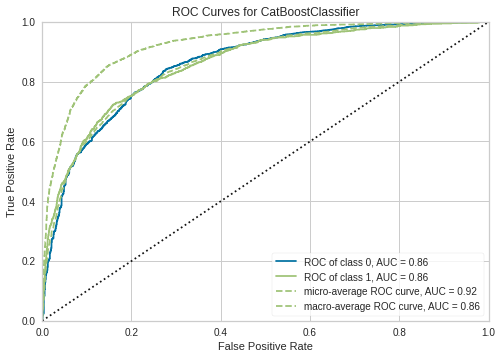

In [ ]:
plot_model(tuned_cat1, plot = 'auc')

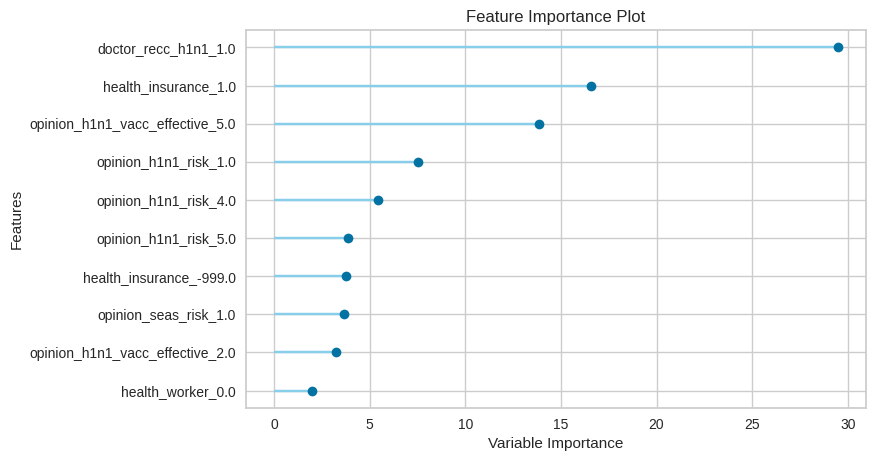

In [ ]:
plot_model(tuned_cat1, plot = 'feature')

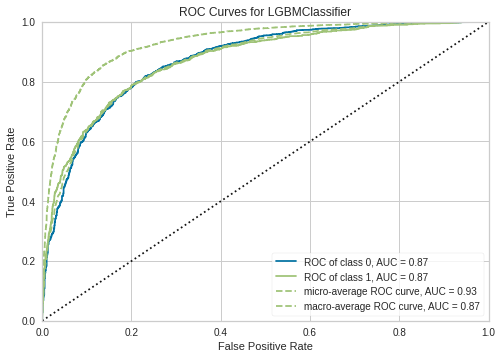

In [ ]:
plot_model(tuned_lgbm1, plot = 'auc')

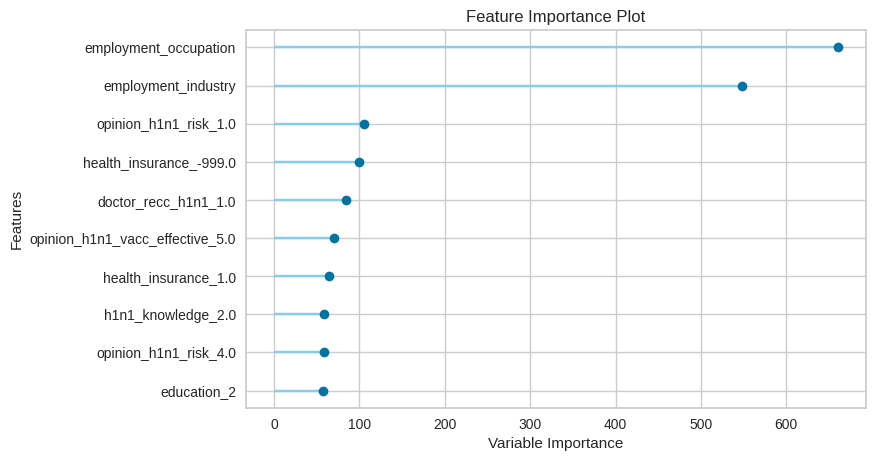

In [ ]:
plot_model(tuned_lgbm1, plot = 'feature')

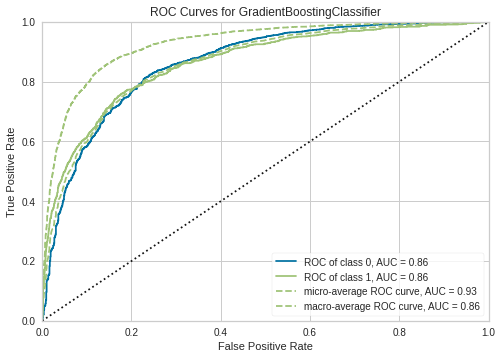

In [ ]:
plot_model(tuned_gbc1, plot = 'auc')

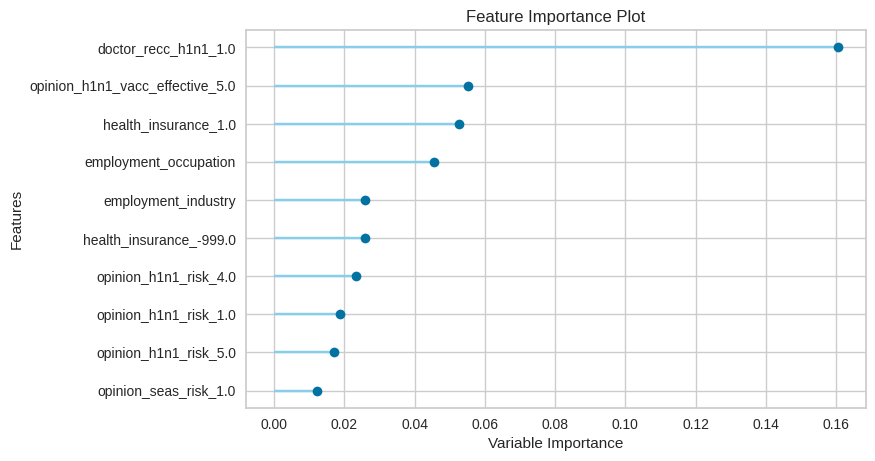

In [ ]:
plot_model(tuned_gbc1, plot = 'feature')

#### 3. finalize model

In [ ]:
sample=pd.read_csv(path+'submission_format.csv')

In [ ]:
# final_model1=finalize_model(tuned_cat1)

In [ ]:
# prediction1=predict_model(final_model1, data = test_features, raw_score=True)

In [ ]:
# sample['h1n1_vaccine']=prediction1['Score_1']

In [ ]:
#blend the model: cat 파라미터 재조정
blender = blend_models(estimator_list= [cat_model, tuned_gbc1, tuned_lgbm1], optimize='AUC')
final_model1=finalize_model(blender)
prediction1=predict_model(final_model1, data = test_features, raw_score=True)
sample['h1n1_vaccine']=prediction1['Score_1']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7938,0.8682,0.7694,0.7848,0.7770,0.5853,0.5854
1,0.7767,0.8513,0.7409,0.7718,0.7560,0.5504,0.5508
2,0.7765,0.8535,0.7429,0.7703,0.7563,0.5500,0.5504
3,0.7917,0.8689,0.7604,0.7864,0.7732,0.5807,0.5810
4,0.7910,0.8680,0.7624,0.7840,0.7731,0.5795,0.5797
Mean,0.7860,0.8620,0.7552,0.7795,0.7671,0.5692,0.5694
SD,0.0077,0.0079,0.0113,0.0069,0.0091,0.0156,0.0155


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [ ]:
#blend the model
blender = blend_models(estimator_list= [tuned_cat1, tuned_gbc1, tuned_lgbm1], optimize='AUC')
final_model1=finalize_model(blender)
prediction1=predict_model(final_model1, data = test_features, raw_score=True)
sample['h1n1_vaccine']=prediction1['Score_1']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7938,0.8682,0.7694,0.7848,0.7770,0.5853,0.5854
1,0.7767,0.8513,0.7409,0.7718,0.7560,0.5504,0.5508
2,0.7765,0.8535,0.7429,0.7703,0.7563,0.5500,0.5504
3,0.7917,0.8689,0.7604,0.7864,0.7732,0.5807,0.5810
4,0.7910,0.8680,0.7624,0.7840,0.7731,0.5795,0.5797
Mean,0.7860,0.8620,0.7552,0.7795,0.7671,0.5692,0.5694
SD,0.0077,0.0079,0.0113,0.0069,0.0091,0.0156,0.0155


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [ ]:
# stacker1 = stack_models(estimator_list= [tuned_cat1, tuned_gbc1, tuned_lgbm1], optimize='AUC')
# final_model1=finalize_model(stacker1)
# prediction1=predict_model(final_model1, data = test_features, raw_score=True)
# sample['h1n1_vaccine']=prediction1['Score_1']

### neural network

In [ ]:
# mlp_clf1 = MLPClassifier(random_state=1, max_iter=300)
# np.mean(cross_val_score(mlp_clf1, train_x.drop(['seasonal_vaccine_mean'],axis=1), train_y1, cv=5, scoring='roc_auc'))
# np.mean(cross_val_score(mlp_clf1, train_x, train_y1, cv=5, scoring='roc_auc'))


## 2. seasonal

### automl (pycaret)

In [ ]:
# clf2 = setup(data=pd.concat([train_features,train_y2], axis=1), target='seasonal_vaccine', train_size=0.8,  session_id=20, fold=5,verbose=False,ignore_features=['h1n1_vaccine_mean'])
clf2 = setup(data=pd.concat([train_features,train_y2], axis=1), target='seasonal_vaccine', train_size=0.8,  session_id=20, fold=5,verbose=False)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
h1n1_concern,Categorical
h1n1_knowledge,Categorical
behavioral_antiviral_meds,Categorical
behavioral_avoidance,Categorical
behavioral_face_mask,Categorical
behavioral_wash_hands,Categorical
behavioral_large_gatherings,Categorical
behavioral_outside_home,Categorical
behavioral_touch_face,Categorical
doctor_recc_h1n1,Categorical


In [ ]:
best2 = compare_models(sort = 'AUC', exclude=['ridge','qda','gpc','svm','rbfsvm','lr','ada','lda','xgboost','rf','et','knn','dt','nb','dummy'], n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7857,0.8622,0.7534,0.7800,0.7664,0.5685,0.5689,11.268
lightgbm,Light Gradient Boosting Machine,0.7868,0.8610,0.7623,0.7769,0.7695,0.5712,0.5713,0.560
gbc,Gradient Boosting Classifier,0.7871,0.8605,0.7591,0.7791,0.7689,0.5716,0.5718,6.500


#### 1. hyperparameter tuning

In [ ]:
tuned_cat2=tune_model(best2[0], optimize='AUC',n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7795,0.8572,0.7373,0.7787,0.7575,0.5557,0.5564
1,0.7700,0.8431,0.7163,0.7741,0.7441,0.5357,0.5371
2,0.7697,0.8470,0.7133,0.7755,0.7431,0.5351,0.5366
3,0.7861,0.8633,0.7378,0.7901,0.7631,0.5685,0.5696
4,0.7779,0.8580,0.7303,0.7800,0.7543,0.5521,0.5531
Mean,0.7766,0.8537,0.7270,0.7797,0.7524,0.5494,0.5506
SD,0.0062,0.0075,0.0104,0.0056,0.0077,0.0127,0.0125


In [ ]:
tuned_lgbm2=tune_model(best2[1], optimize='AUC',n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7915,0.8675,0.7739,0.7782,0.7761,0.5810,0.5810
1,0.7774,0.8484,0.7414,0.7727,0.7567,0.5518,0.5522
2,0.7814,0.8556,0.7544,0.7722,0.7632,0.5603,0.5604
3,0.7938,0.8670,0.7714,0.7836,0.7775,0.5854,0.5855
4,0.7840,0.8643,0.7639,0.7713,0.7676,0.5658,0.5658
Mean,0.7856,0.8606,0.7610,0.7756,0.7682,0.5689,0.5690
SD,0.0061,0.0074,0.0120,0.0047,0.0078,0.0126,0.0125


In [ ]:
tuned_gbc2=tune_model(best2[2], optimize='AUC',n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7922,0.8634,0.7794,0.7763,0.7779,0.5826,0.5826
1,0.7709,0.8455,0.7398,0.7624,0.7510,0.5389,0.5391
2,0.7692,0.8435,0.7409,0.7591,0.7499,0.5358,0.5359
3,0.7866,0.8609,0.7584,0.7787,0.7684,0.5706,0.5707
4,0.7831,0.8602,0.7539,0.7753,0.7644,0.5635,0.5636
Mean,0.7804,0.8547,0.7545,0.7704,0.7623,0.5583,0.5584
SD,0.0089,0.0084,0.0144,0.0080,0.0107,0.0182,0.0181


#### 2. visualization models

In [ ]:
# evaluate_model(tuned_cat1)

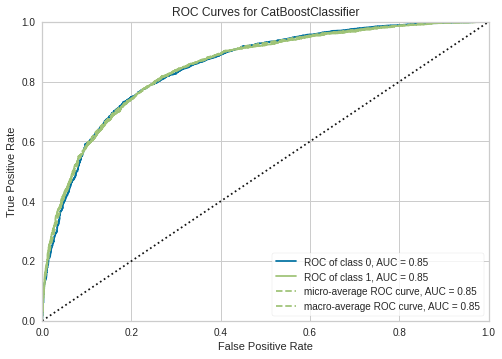

In [ ]:
plot_model(tuned_cat2, plot = 'auc')

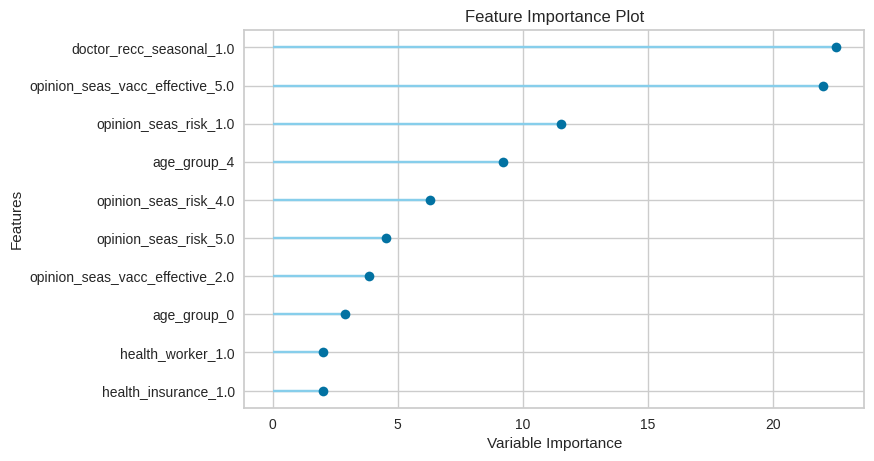

In [ ]:
plot_model(tuned_cat2, plot = 'feature')

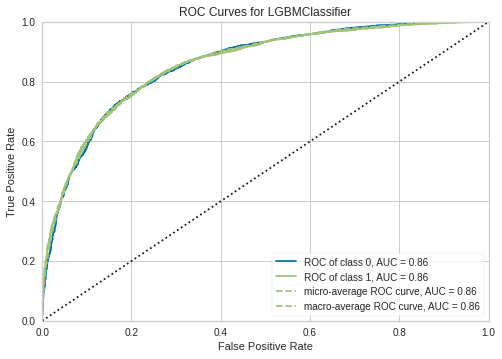

In [ ]:
plot_model(tuned_lgbm2, plot = 'auc')

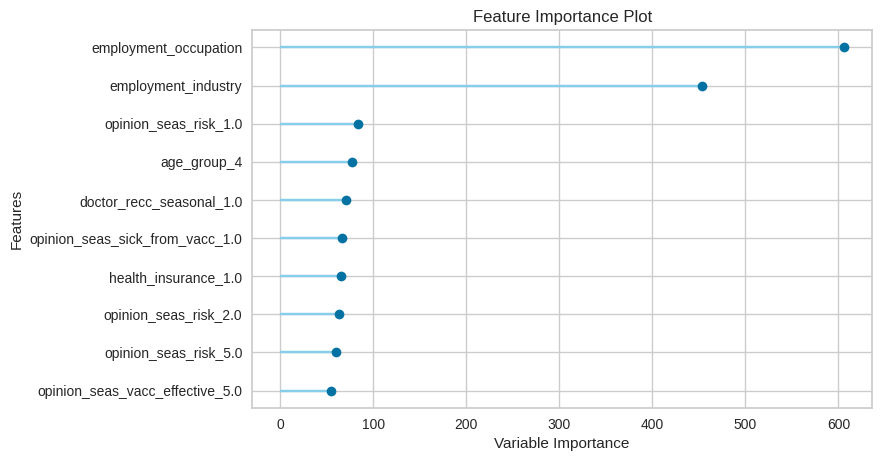

In [ ]:
plot_model(tuned_lgbm2, plot = 'feature')

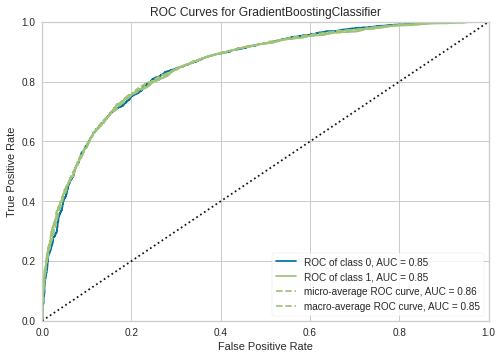

In [ ]:
plot_model(tuned_gbc2, plot = 'auc')

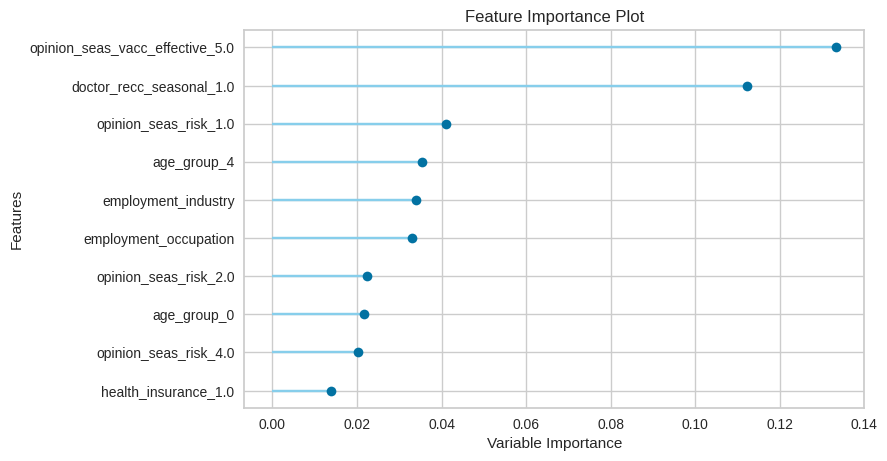

In [ ]:
plot_model(tuned_gbc2, plot = 'feature')

#### 3. finalize model

In [ ]:
# final_model2=finalize_model(tuned_cat2)

In [ ]:
# prediction2=predict_model(final_model2, data = test_features, raw_score=True)

In [ ]:
# # sample['seasonal_vaccine']=prediction2['Score_1']
# sample

In [ ]:
#blend the model
blender2 = blend_models(estimator_list= [cat_model, tuned_gbc2, tuned_lgbm2], optimize='AUC')
final_model2=finalize_model(blender2)
prediction2=predict_model(final_model2, data = test_features, raw_score=True)
sample['seasonal_vaccine']=prediction2['Score_1']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7924,0.8691,0.7709,0.7815,0.7762,0.5827,0.5827
1,0.7770,0.8511,0.7404,0.7725,0.7561,0.5508,0.5512
2,0.7800,0.8543,0.7449,0.7752,0.7597,0.5570,0.5574
3,0.7938,0.8701,0.7644,0.7877,0.7759,0.5851,0.5853
4,0.7894,0.8672,0.7614,0.7818,0.7715,0.5762,0.5764
Mean,0.7865,0.8624,0.7564,0.7797,0.7679,0.5704,0.5706
SD,0.0068,0.0080,0.0118,0.0054,0.0084,0.0139,0.0137


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

In [ ]:
#blend the model
blender2 = blend_models(estimator_list= [tuned_cat2, tuned_gbc2, tuned_lgbm2], optimize='AUC')
final_model2=finalize_model(blender2)
prediction2=predict_model(final_model2, data = test_features, raw_score=True)
sample['seasonal_vaccine']=prediction2['Score_1']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7924,0.8691,0.7709,0.7815,0.7762,0.5827,0.5827
1,0.7770,0.8511,0.7404,0.7725,0.7561,0.5508,0.5512
2,0.7800,0.8543,0.7449,0.7752,0.7597,0.5570,0.5574
3,0.7938,0.8701,0.7644,0.7877,0.7759,0.5851,0.5853
4,0.7894,0.8672,0.7614,0.7818,0.7715,0.5762,0.5764
Mean,0.7865,0.8624,0.7564,0.7797,0.7679,0.5704,0.5706
SD,0.0068,0.0080,0.0118,0.0054,0.0084,0.0139,0.0137


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

In [ ]:
# stacker2 = stack_models(estimator_list= [tuned_cat2, tuned_gbc2, tuned_lgbm2], optimize='AUC')
# # final_model2=finalize_model(stacker2)
# prediction1=predict_model(final_model2, data = test_features, raw_score=True)
# sample['h1n1_vaccine']=prediction1['Score_1']

### neural network

In [ ]:
# mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
# # np.mean(cross_val_score(mlp_clf2, train_x.drop(['h1n1_vaccine_mean'],axis=1), train_y2, cv=5, scoring='roc_auc'))
# np.mean(cross_val_score(mlp_clf2, train_x, train_y2, cv=5, scoring='roc_auc'))

# Making submission file

In [ ]:
sample.set_index('respondent_id', inplace=True)
sample.to_csv(path+'result_blend_feature1.csv', sep=',', na_rep='NaN')
sample.reset_index(inplace=True)

tuned_gbc_mod: 0.8393 </br>
tuned_lgbm_mod: 0.7859 </br>
tuned_cat_mod: 0.7783 </br>
tuned_blend_mod: 0.7867 </br>
stacking_mod: 0.6060 ㅠㅠ 별로네



<strong>blending: 0.8599</br></strong>
Stacking: 0.6148